In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

Processing record 1|mataura
Processing record 2|husavik
Processing record 3|mbanza-ngungu
Processing record 4|puri
Processing record 5|boras
Processing record 6|punta arenas
City not found. skipping.
Processing record 7|port hardy
Processing record 8|bumba
Processing record 9|haines junction
City not found. skipping.
Processing record 10|gurupa
City not found. skipping.
City not found. skipping.
Processing record 11|awbari
Processing record 12|airai
Processing record 13|cabo san lucas
Processing record 14|puerto ayora
Processing record 15|ojinaga
Processing record 16|svetlaya
Processing record 17|ushuaia
Processing record 18|mahebourg
Processing record 19|vaini
Processing record 20|qaanaaq
Processing record 21|busselton
Processing record 22|dikson
Processing record 23|trenggalek
Processing record 24|port augusta
Processing record 25|bengkulu
Processing record 26|kavieng
Processing record 27|lima
Processing record 28|the valley
City not found. skipping.
Processing record 29|boende
Proce

In [8]:
# Create a panda data frame using data retrieved
cities_df = pd.DataFrame({ 
                "City" : city_name,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Humidity" : humidity,
                "Cloudiness" : cloudiness,
                "Wind Speed" : wind_speed,
                "Country" : country,
                "Date" : date}) 

In [9]:
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,42.01,97,100,3.00,NZ,1620402556
1,Husavik,66.0449,-17.3389,35.60,60,75,14.97,IS,1620402556
2,Mbanza-Ngungu,-5.2500,14.8667,74.52,88,100,4.76,CD,1620402557
3,Puri,19.8000,85.8500,84.99,78,40,5.75,IN,1620402557
4,Borås,57.7210,12.9401,48.00,65,40,4.61,SE,1620402380
...,...,...,...,...,...,...,...,...,...
538,Mweka,-4.8500,21.5667,73.33,93,81,3.04,CD,1620402675
539,Pascagoula,30.3658,-88.5561,78.01,50,1,5.75,US,1620402675
540,Mackenzie,55.2999,-123.1698,39.20,100,90,9.22,CA,1620402676
541,Yuci,37.6803,112.7319,55.40,26,0,4.47,CN,1620402676


In [10]:
cities_df.sort_values(by="Humidity", ascending=False)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
395,Bintulu,3.1667,113.0333,77.00,100,20,3.44,MY,1620402644
475,Kathu,7.9178,98.3332,88.00,100,40,10.22,TH,1620402661
39,Mersing,2.4312,103.8405,77.00,100,99,5.75,MY,1620402564
424,Port-Cartier,50.0334,-66.8654,39.99,100,90,6.91,CA,1620402650
333,Itoman,26.1247,127.6694,77.00,100,75,11.50,JP,1620402630
...,...,...,...,...,...,...,...,...,...
298,Bilma,18.6853,12.9164,107.38,4,5,10.20,NE,1620402623
404,Agadez,19.7500,10.2500,104.97,4,2,9.66,NE,1620402603
310,Jalu,29.0331,21.5482,110.25,4,1,10.83,LY,1620402625
489,Arlit,18.7369,7.3853,108.43,3,6,3.47,NE,1620402664


In [11]:
cities_df.to_csv("../output_data/cities.csv", index = False)

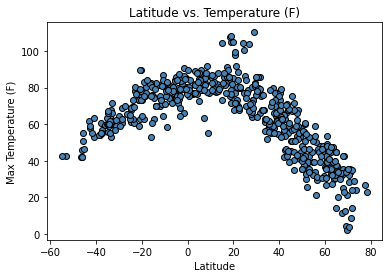

Temperatures decrease in cities further from the equator
Cities closer to or on the equator have the highest temperatures


In [26]:
#-------LATITUDE VS TEMPERATURE PLOT---------
x = cities_df["Lat"]
y = cities_df["Max Temp"]
#Plot data
plt.scatter(x,y, facecolor = "steelblue",edgecolor = "black")

#set labels for x and y axis
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Title
plt.title("Latitude vs. Temperature (F)")

plt.savefig("../output_data/lat_vs_temp.png")
plt.show()

print(f"Temperatures decrease in cities further from the equator")
print(f"Cities closer to or on the equator have the highest temperatures")


Greater Humidity levels at equator while humidity levels spread out across locations moving away from the equator


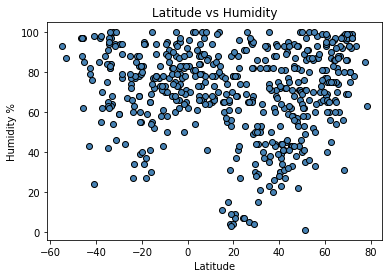

In [28]:
#---------LATITUDE VS HUMIDITY-------
#SET X AND Y
x = cities_df["Lat"]
y = cities_df["Humidity"]

#PLOT DATA
plt.scatter(x,y, facecolor = "steelblue",edgecolor = "black")

#SET LABELS FOR X AND Y AXIS
plt.xlabel("Latitude")

plt.ylabel("Humidity %")

#CREATE TITLE AND SAVE IMAGE
plt.title("Latitude vs Humidity")

plt.savefig("../output_data/lat_vs_humidity.png")

plt.show

print(f"Greater Humidity levels at equator while humidity levels spread out across locations moving away from the equator")

Cloudiness increases further from equator


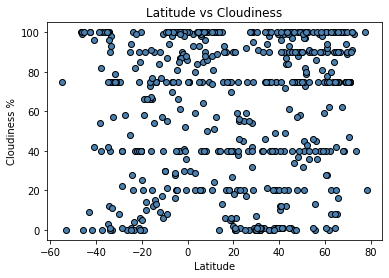

In [29]:
#SET X AND Y
x = cities_df["Lat"]
y = cities_df["Cloudiness"]

#PLOT DATA
plt.scatter(x,y, facecolor = "steelblue",edgecolor = "black")

#SET LABELS FOR X AND Y AXIS
plt.xlabel("Latitude")

plt.ylabel("Cloudiness %")

#CREATE TITLE AND SAVE IMAGE
plt.title("Latitude vs Cloudiness")

plt.savefig("../output_data/lat_vs_cloudiness.png")

plt.show
print(f"Cloudiness increases further from equator")

Wind Speed tends to stay below 15 mph for all cities.


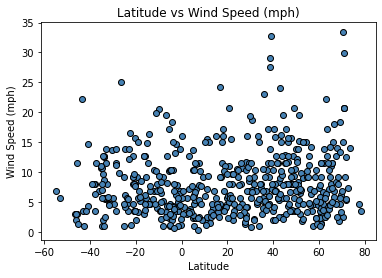

In [30]:
#SET X AND Y
x = cities_df["Lat"]
y = cities_df["Wind Speed"]

#PLOT DATA
plt.scatter(x,y, facecolor = "steelblue",edgecolor = "black")

#SET LABELS FOR X AND Y AXIS
plt.xlabel("Latitude")

plt.ylabel("Wind Speed (mph)")

#CREATE TITLE AND SAVE IMAGE
plt.title("Latitude vs Wind Speed (mph)")

plt.savefig("../output_data/lat_vs_cloudiness.png")

plt.show
print(f"Wind Speed tends to stay below 15 mph for all cities.")

In [16]:
#NOTHERN AND SOUTHERN HEMISPHERES
hem_N = cities_df.loc[cities_df["Lat"]>0]
hem_S = cities_df.loc[cities_df["Lat"]<0]

In [17]:
def lin_reg(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(x.median(),y.median()),fontsize=17,color="red")
    plt.xlabel("Latitude")
    return line_eq



The r-squared is : -0.87
Correlation coefficient is negative in northern hemisphere.
Temperatures greater as latitude approaches 0


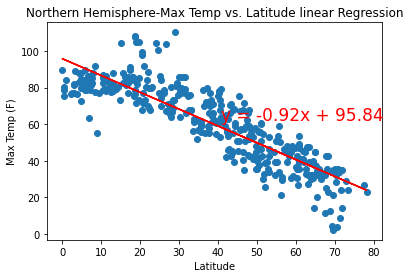

In [31]:
#CALL LINEAR REGRESSION AND ANNOTATION FUNCTIONS
linear_equation = lin_reg(hem_N["Lat"], hem_N["Max Temp"])


#SET TITLE AND LABELS FOR X AND Y AXIS THEN SAVE IMAGE
plt.title("Northern Hemisphere-Max Temp vs. Latitude linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Max Temp (F)")

plt.savefig("../output_data/Northern_temp_vs_lat_linear.png")
print(f"Correlation coefficient is negative in northern hemisphere.\nTemperatures greater as latitude approaches 0")

The r-squared is : 0.81
Postive correlation in southern hemisphere.
Similar pattern as in northern hemisphere, temperatures increase as latitude approaches 0


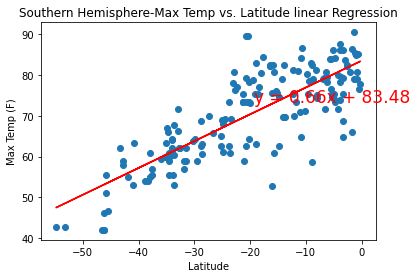

In [33]:
#CALL LINEAR REGRESSION AND ANNOTATION FUNCTIONS
linear_equation = lin_reg(hem_S["Lat"], hem_S["Max Temp"])


#SET TITLE AND LABELS FOR X AND Y AXIS THEN SAVE IMAGE
plt.title("Southern Hemisphere-Max Temp vs. Latitude linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Max Temp (F)")

plt.savefig("../output_data/Southern_temp_vs_lat_linear.png")
print(f"Postive correlation in southern hemisphere.\nSimilar pattern as in northern hemisphere, temperatures increase as latitude approaches 0")

The r-squared is : 0.13
almost no relationship between latitude and humidity from dataset


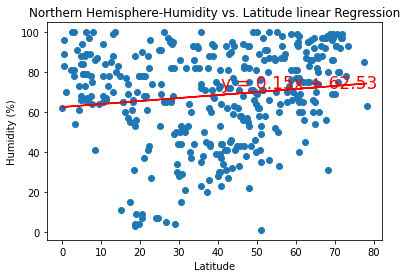

In [34]:
#CALL LINEAR REGRESSION AND ANNOTATION FUNCTIONS
linear_equation = lin_reg(hem_N["Lat"], hem_N["Humidity"])


#SET TITLE AND LABELS FOR X AND Y AXIS THEN SAVE IMAGE
plt.title("Northern Hemisphere-Humidity vs. Latitude linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

plt.savefig("../output_data/Northern_Humidity_vs_lat_linear.png")
print(f"almost no relationship between latitude and humidity from dataset")

The r-squared is : -0.06
near zero coefficient.
realtionship between latitude and humidty almost non-existent


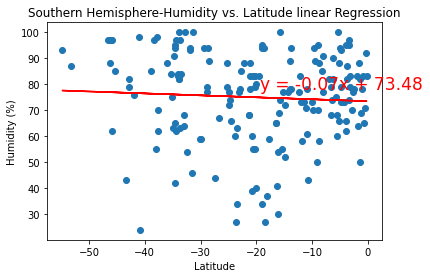

In [36]:
#CALL LINEAR REGRESSION AND ANNOTATION FUNCTIONS
linear_equation = lin_reg(hem_S["Lat"], hem_S["Humidity"])


#SET TITLE AND LABELS FOR X AND Y AXIS THEN SAVE IMAGE
plt.title("Southern Hemisphere-Humidity vs. Latitude linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

plt.savefig("../output_data/Southern_Humidity_vs_lat_linear.png")
print(f"near zero coefficient.\nrealtionship between latitude and humidty almost non-existent")

The r-squared is : 0.14
relationship between latitude and cloudiness is minimal


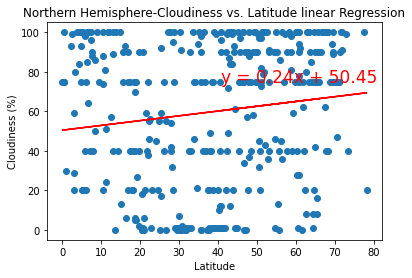

In [38]:
#CALL LINEAR REGRESSION AND ANNOTATION FUNCTIONS
linear_equation = lin_reg(hem_N["Lat"], hem_N["Cloudiness"])


#SET TITLE AND LABELS FOR X AND Y AXIS THEN SAVE IMAGE
plt.title("Northern Hemisphere-Cloudiness vs. Latitude linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

plt.savefig("../output_data/Northern_Cloudiness_vs_lat_linear.png")
print("relationship between latitude and cloudiness is minimal")

The r-squared is : 0.07
relationship between latitude and cloudiness minimal as seen in northern hemisphere


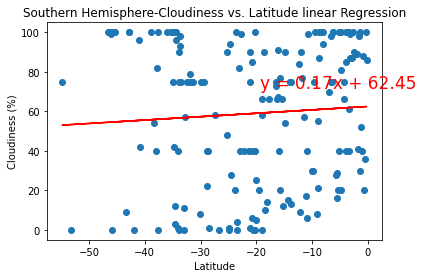

In [39]:
#CALL LINEAR REGRESSION AND ANNOTATION FUNCTIONS
linear_equation = lin_reg(hem_S["Lat"], hem_S["Cloudiness"])


#SET TITLE AND LABELS FOR X AND Y AXIS THEN SAVE IMAGE
plt.title("Southern Hemisphere-Cloudiness vs. Latitude linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

plt.savefig("../output_data/Southern_Cloudiness_vs_lat_linear.png")
print(f"relationship between latitude and cloudiness minimal as seen in northern hemisphere")

The r-squared is : 0.15
Almost no relationship between latitude and wind speed with small correlation coefficient


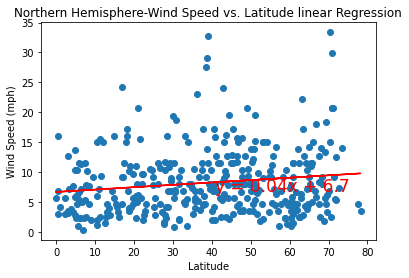

In [40]:
#CALL LINEAR REGRESSION AND ANNOTATION FUNCTIONS
linear_equation = lin_reg(hem_N["Lat"], hem_N["Wind Speed"])


#SET TITLE AND LABELS FOR X AND Y AXIS THEN SAVE IMAGE
plt.title("Northern Hemisphere-Wind Speed vs. Latitude linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (mph)")

plt.savefig("../output_data/Northern_windSpeed_vs_lat_linear.png")
print(f"Almost no relationship between latitude and wind speed with small correlation coefficient")

The r-squared is : -0.01
Relationship between latitude and windspeed nearly non-existent


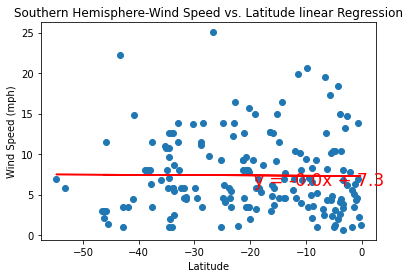

In [41]:
#CALL LINEAR REGRESSION AND ANNOTATION FUNCTIONS
linear_equation = lin_reg(hem_S["Lat"], hem_S["Wind Speed"])


#SET TITLE AND LABELS FOR X AND Y AXIS THEN SAVE IMAGE
plt.title("Southern Hemisphere-Wind Speed vs. Latitude linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (mph)")

plt.savefig("../output_data/Southern_windSpeed_vs_lat_linear.png")
print(f"Relationship between latitude and windspeed nearly non-existent")